## Examine spatial dependency patterns in real datasets

In this tutorial, we will explore the spatial structure in various ST datasets. Technologies profiled include 10x Visium, Slide-seqV2, Stereo-seq, Spatial-CUT&Tag. All preprocessed datasets can be downloaded from [SODB](https://gene.ai.tencent.com/SpatialOmics/). 

In [1]:
import itertools
import torch
import numpy as np
import pandas as pd
from plotnine import *
import patchworklib as pw

import smoother
from smoother.utils import *

import scanpy as sc
import anndata

<Figure size 100x100 with 0 Axes>

Datasets include:
- 10x Visium human brain dorsolateral prefrontal cortex (DLPFC). 
  - Maynard, Kristen R., et al. "Transcriptome-scale spatial gene expression in the human dorsolateral prefrontal cortex." Nature neuroscience 24.3 (2021): 425-436.
- 10x Visium human pancreatic ductal adenocarcinoma (PDAC). 
  - Barkley, Dalia, et al. "Cancer cell states recur across tumor types and form specific interactions with the tumor microenvironment." Nature genetics 54.8 (2022): 1192-1201.
- Slide-seqV2 mouse hippocampus. 
  - Stickels, Robert R., et al. "Highly sensitive spatial transcriptomics at near-cellular resolution with Slide-seqV2." Nature biotechnology 39.3 (2021): 313-319.
- Slide-seqV2 human melanoma brain metastasis (MBM). 
  - Biermann, Jana, et al. "Dissecting the treatment-naive ecosystem of human melanoma brain metastasis." Cell 185.14 (2022): 2591-2608.
- Stereo-seq axolotl brain (segmented and binned at single-cell resolution). 
  - Wei, Xiaoyu, et al. "Single-cell Stereo-seq reveals induced progenitor cells involved in axolotl brain regeneration." Science 377.6610 (2022): eabp9444.
- Stereo-seq human colorectal cancer (CRC, binned into 50 µm x 50 µm spots). 
  - Zhang, Rongxin, et al. "Spatial transcriptome unveils a discontinuous inflammatory pattern in proficient mismatch repair colorectal adenocarcinoma." Fundamental Research (2022).
- Spatial-CUT&Tag mouse embryo, H3K4me3 20µm. 
  - Deng, Yanxiang, et al. "Spatial-CUT&Tag: spatially resolved chromatin modification profiling at the cellular level." Science 375.6581 (2022): 681-686.
- Spatial-CUT&Tag mouse embryo, H3K4me3 50µm. 
  - Deng, Yanxiang, et al. "Spatial-CUT&Tag: spatially resolved chromatin modification profiling at the cellular level." Science 375.6581 (2022): 681-686.
- Shuffled Stereo-seq single-cell resolution data. 
  - Per contamination rate p, each spot contains 1-p of its original RNA counts and p of RNA counts from its adjacent neighbors. 

In [2]:
# all preprocessed ST data downloaded were from https://gene.ai.tencent.com/SpatialOmics/
data_dir = "/Users/jysumac/Projects/Smoother_paper/data/sodb_samples/"

### 10X Visium

#### Normal - Brain

In [3]:
data = sc.read_h5ad(data_dir + "visium_normal/10X_Visium_maynard2021trans_151673_data.h5ad")
features = torch.tensor(data.obsm['X_pca'])[:,0:20].T
coords = data.obsm['spatial']

In [4]:
df_k = quantile_feature_similarity_neighbor(features, coords, k = 6, reduce = 'none')
df_all = quantile_feature_similarity_decay(features, coords, reduce = 'none')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 249.56it/s]


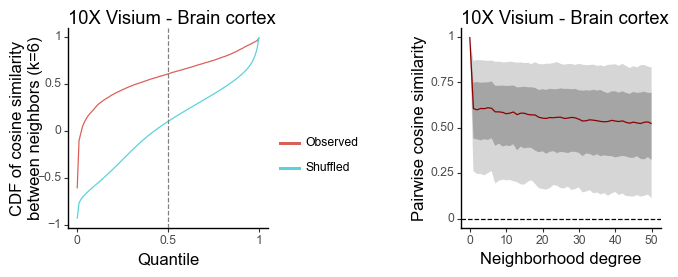

In [5]:
g1 = plot_similarity_cdf(df_k, title = '10X Visium - Brain cortex') + labs(y = 'CDF of cosine similarity\nbetween neighbors (k=6)')
g2 = plot_similarity_decay(df_all, title = '10X Visium - Brain cortex')

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g12 = (g1|g2)
g12.savefig()

#### Tumor - HGSC

In [6]:
data = sc.read_h5ad(data_dir + "visium_tumor/10X_Visium_gracia2021genome_HGSC_V19T26-103_A1_data.h5ad")
features = torch.tensor(data.obsm['X_pca'])[:,0:20].T
coords = data.obsm['spatial']

In [7]:
df_k = quantile_feature_similarity_neighbor(features, coords, k = 6, reduce = 'none')
df_all = quantile_feature_similarity_decay(features, coords, reduce = 'none')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 167.82it/s]


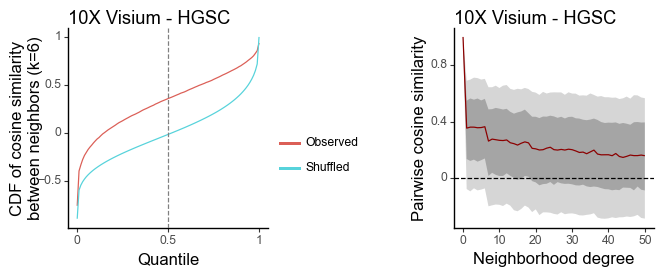

In [8]:
g1 = plot_similarity_cdf(df_k, title = '10X Visium - HGSC') + labs(y = 'CDF of cosine similarity\nbetween neighbors (k=6)')
g2 = plot_similarity_decay(df_all, title = '10X Visium - HGSC')

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g12 = (g1|g2)
g12.savefig()

#### Tumor - PDAC

In [9]:
data = sc.read_h5ad(data_dir + "visium_tumor/10X_Visium_Barkley2022Cancer_GSM6177618_NYU_PDAC1_Vis_processed_data.h5ad")
features = torch.tensor(data.obsm['X_pca'])[:,0:20].T
coords = data.obsm['spatial']

In [10]:
df_k = quantile_feature_similarity_neighbor(features, coords, k = 6, reduce = 'none')
df_all = quantile_feature_similarity_decay(features, coords, reduce = 'none')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 478.93it/s]


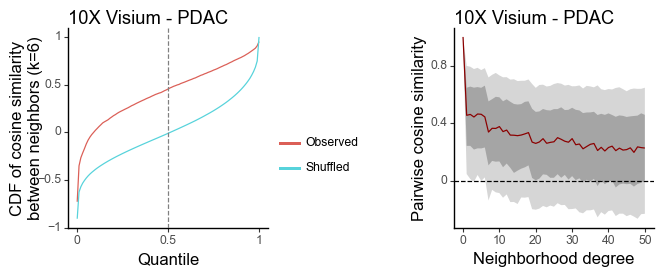

In [11]:
g1 = plot_similarity_cdf(df_k, title = '10X Visium - PDAC') + labs(y = 'CDF of cosine similarity\nbetween neighbors (k=6)')
g2 = plot_similarity_decay(df_all, title = '10X Visium - PDAC')

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g12 = (g1|g2)
g12.savefig()

### Slide-seqV2

#### Normal - Mouse brain cortex

In [12]:
data = sc.read_h5ad(data_dir + "Slide-seq_normal/Slide-seqV2_stickels2020highly_stickels2021highly_Slide-seqV2_Mouse_Hippocampus_Puck_200115_08_data_whole.h5ad")
features = torch.tensor(data.obsm['X_pca'])[:,0:20].T
coords = data.obsm['spatial']

In [13]:
df_k = quantile_feature_similarity_neighbor(features, coords, k = 4, reduce = 'none', n_null = 50)
df_all = quantile_feature_similarity_decay(features, coords, reduce = 'none')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:04<00:00, 12.12it/s]


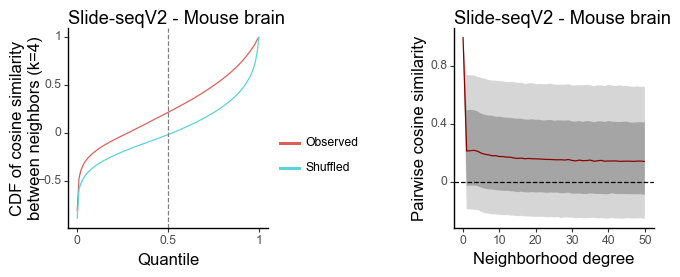

In [14]:
g1 = plot_similarity_cdf(df_k, title = 'Slide-seqV2 - Mouse brain') + labs(y = 'CDF of cosine similarity\nbetween neighbors (k=4)')
g2 = plot_similarity_decay(df_all, title = 'Slide-seqV2 - Mouse brain')

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g12 = (g1|g2)
g12.savefig()

#### Tumor - MBM

In [15]:
data = sc.read_h5ad(data_dir + "Slide-seq_tumor/Slide-seqV2_Biermann2022Dissecting_GSM6025935_MBM05_rep1_data.h5ad")
features = torch.tensor(data.obsm['X_pca'])[:,0:20].T
coords = data.obsm['spatial']

In [16]:
df_k = quantile_feature_similarity_neighbor(features, coords, k = 4, reduce = 'none', n_null = 50)
df_all = quantile_feature_similarity_decay(features, coords, reduce = 'none')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:02<00:00, 19.93it/s]


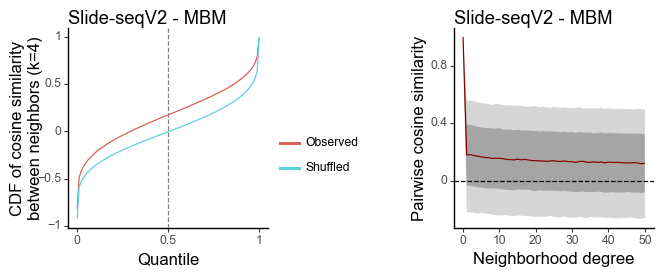

In [17]:
g1 = plot_similarity_cdf(df_k, title = 'Slide-seqV2 - MBM') + labs(y = 'CDF of cosine similarity\nbetween neighbors (k=4)')
g2 = plot_similarity_decay(df_all, title = 'Slide-seqV2 - MBM')

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g12 = (g1|g2)
g12.savefig()

### Stereo-seq

#### Normal - Axolotl brain (single-cell segmentation)

In [18]:
data = sc.read_h5ad(data_dir + "Stereo-seq_normal/Stereo-seq_wei2022single_60DPI_data.h5ad")
features = torch.tensor(data.obsm['X_pca'])[:,0:20].T
coords = data.obsm['spatial']

In [19]:
df_k = quantile_feature_similarity_neighbor(features, coords, k = 4, reduce = 'none', n_null = 100)
df_all = quantile_feature_similarity_decay(features, coords, reduce = 'none')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 58.72it/s]


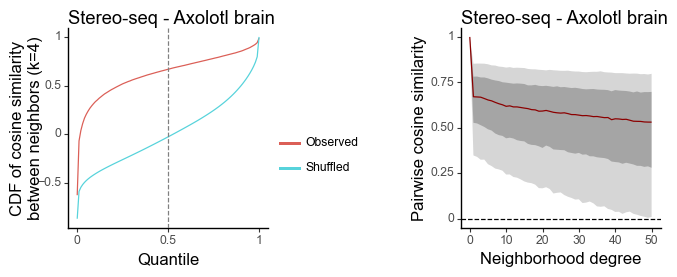

In [20]:
g1 = plot_similarity_cdf(df_k, title = 'Stereo-seq - Axolotl brain') + labs(y = 'CDF of cosine similarity\nbetween neighbors (k=4)')
g2 = plot_similarity_decay(df_all, title = 'Stereo-seq - Axolotl brain')

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g12 = (g1|g2)
g12.savefig()

#### Tumor - CRC

In [21]:
data = sc.read_h5ad("/Users/jysumac/Projects/Smoother_paper/data/crc_stereo/"
                    "P19_T.h5ad")
sc.pp.normalize_total(data, target_sum=1e4)
sc.pp.log1p(data)
sc.pp.highly_variable_genes(data)
sc.pp.scale(data)
sc.tl.pca(data)
features = torch.tensor(data.obsm['X_pca'])[:,0:20].T
coords = data.obs[['x', 'y']]

In [22]:
df_k = quantile_feature_similarity_neighbor(features, coords, k = 4, reduce = 'none', n_null = 100)
df_all = quantile_feature_similarity_decay(features, coords, reduce = 'none')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 35.67it/s]


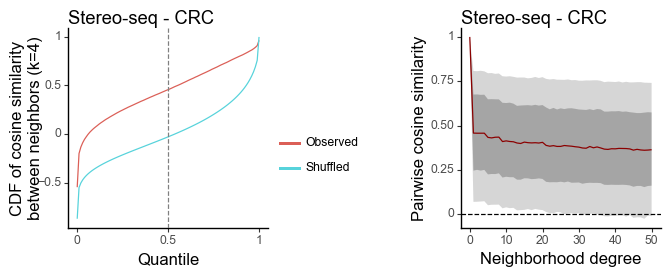

In [23]:
g1 = plot_similarity_cdf(df_k, title = 'Stereo-seq - CRC') + labs(y = 'CDF of cosine similarity\nbetween neighbors (k=4)')
g2 = plot_similarity_decay(df_all, title = 'Stereo-seq - CRC')

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g12 = (g1|g2)
g12.savefig()

### Spatial-CUT&TAG

#### H3Kme3 - 20um

In [24]:
data = pd.read_csv(
    "/Users/jysumac/Projects/Smoother_paper/data/cutntag_processed/H3K4me3.20um.all_gene_score.csv",
    index_col=0
)
data = anndata.AnnData(data.T)
sc.pp.normalize_total(data, target_sum=1e4)
sc.pp.log1p(data)
sc.pp.highly_variable_genes(data)
sc.pp.scale(data)
sc.tl.pca(data)

In [25]:
features = torch.tensor(data.obsm['X_pca'].copy())[:,0:20].T
coords = pd.read_csv(
    "/Users/jysumac/Projects/Smoother_paper/data/cutntag_processed/H3K4me3.20um.coord.csv",
    index_col=0
)

In [26]:
df_k = quantile_feature_similarity_neighbor(features, coords, k = 4, reduce = 'none', n_null = 100)
df_all = quantile_feature_similarity_decay(features, coords, reduce = 'none')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 377.80it/s]


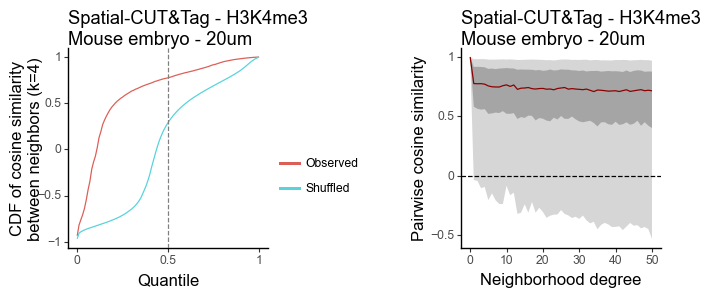

In [27]:
g1 = plot_similarity_cdf(df_k, title = 'Spatial-CUT&Tag - H3K4me3\nMouse embryo - 20um') + labs(y = 'CDF of cosine similarity\nbetween neighbors (k=4)')
g2 = plot_similarity_decay(df_all, title = 'Spatial-CUT&Tag - H3K4me3\nMouse embryo - 20um')

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g12 = (g1|g2)
g12.savefig()

#### H3Kme3 - 50um

In [28]:
data = pd.read_csv(
    "/Users/jysumac/Projects/Smoother_paper/data/cutntag_processed/H3K4me3.50um.all_gene_score.csv",
    index_col=0
)
data = anndata.AnnData(data.T)
sc.pp.normalize_total(data, target_sum=1e4)
sc.pp.log1p(data)
sc.pp.highly_variable_genes(data)
sc.pp.scale(data)
sc.tl.pca(data)

In [29]:
features = torch.tensor(data.obsm['X_pca'].copy())[:,0:20].T
coords = pd.read_csv(
    "/Users/jysumac/Projects/Smoother_paper/data/cutntag_processed/H3K4me3.50um.coord.csv",
    index_col=0
)

In [30]:
df_k = quantile_feature_similarity_neighbor(features, coords, k = 4, reduce = 'none', n_null = 100)
df_all = quantile_feature_similarity_decay(features, coords, reduce = 'none')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 399.14it/s]


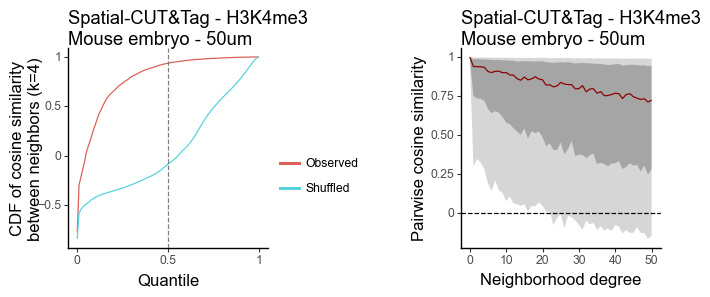

In [31]:
g1 = plot_similarity_cdf(df_k, title = 'Spatial-CUT&Tag - H3K4me3\nMouse embryo - 50um') + labs(y = 'CDF of cosine similarity\nbetween neighbors (k=4)')
g2 = plot_similarity_decay(df_all, title = 'Spatial-CUT&Tag - H3K4me3\nMouse embryo - 50um')

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g12 = (g1|g2)
g12.savefig()

### Simulated data

In [32]:
data = sc.read_h5ad(data_dir + "Stereo-seq_normal/Stereo-seq_wei2022single_60DPI_data.h5ad")
# shuffle the data
features_T = torch.tensor(data.X.toarray()).to_sparse()
coords = data.obsm['spatial'].copy()
np.random.shuffle(coords)

# construct spatial weights for swapping
swm = smoother.SpatialWeightMatrix()
swm.calc_weights_dist(coords, radius_cutoff=50, row_scale=True)

Number of spots: 10964. Average number of neighbors per spot:  4.87.


In [33]:
props = [0, 0.2, 0.5]
df_k_list, df_all_list = [], []
for p in props:
    # each new spot will contain 1-p of the original counts and p counts from its neighbors
    scaling = swm.swm * p + torch.sparse_coo_tensor(
        torch.arange(features_T.shape[0]).repeat(2,1),
        torch.ones(features_T.shape[0]),
        swm.swm.shape
    ) * (1-p)
    new_f = scaling @ features_T

    # calculate stats
    df_k = quantile_feature_similarity_neighbor(new_f.to_dense().T, coords, k = 4, reduce = 'pca', dim = 20, n_null = 100)
    df_k['swap_props'] = p
    df_all = quantile_feature_similarity_decay(new_f.to_dense().T, coords, reduce = 'pca', dim = 20)
    df_all['swap_props'] = p
    
    df_k_list.append(df_k)
    df_all_list.append(df_all)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 63.63it/s]


In [34]:
df_k = pd.concat(df_k_list)
df_k = df_k[df_k['Data'] == 'Observed']
df_k['Data'][df_k['swap_props'] == 0] = 'No swapping'
df_k['Data'][df_k['swap_props'] == 0.2] = '20% contamination'
df_k['Data'][df_k['swap_props'] == 0.5] = '50% contamination'

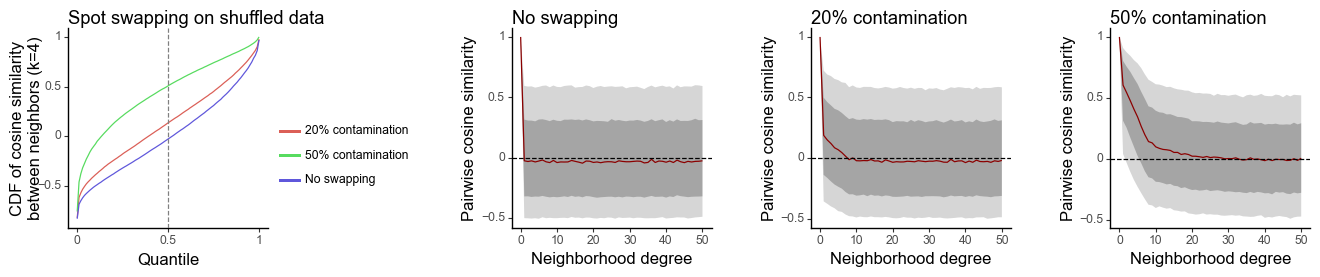

In [35]:
g0 = plot_similarity_cdf(df_k, title = 'Spot swapping on shuffled data') + \
    labs(y = 'CDF of cosine similarity\nbetween neighbors (k=4)')
g1 = plot_similarity_decay(df_all_list[0], title = 'No swapping')
g2 = plot_similarity_decay(df_all_list[1], title = '20% contamination')
g3 = plot_similarity_decay(df_all_list[2], title = '50% contamination')

g0 = pw.load_ggplot(g0, figsize=(2,2))
g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g3 = pw.load_ggplot(g3, figsize=(2,2))

g = (g0|g1|g2|g3)
g.savefig()